In [4]:
import json
import pandas as pd

In [5]:
r = open('data.json')
record_data = json.load(r)

In [6]:
df = pd.json_normalize(record_data['data'])

In [7]:
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,33.844371,Alpharetta,GA,-84.474050,30009,NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,42.446396,Westford,MA,-71.459405,01886,NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,44.624413,Saranac,NY,-73.809266,12981,NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,36.747083,Lampe,MO,-93.458626,65681,NaN


In [8]:
df.describe(include='all')

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
count,50000,50000,50000,50000,50000,50000,50000,5.000000e+04,50000.000000,50000,50000,50000.000000,50000,20658.000000
unique,5,2,3,5,2,10466,2,NaN,NaN,2887,51,NaN,4959,NaN
top,Sports,View Project,F,18-24,married,f396a9f77e3a4113b6f228f64d3afd48,iOS,NaN,NaN,Atlanta,IN,NaN,97034,NaN
freq,10099,29342,23291,24395,32083,27,32287,NaN,NaN,6341,8909,NaN,1646,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.394693e+09,38.560903,NaN,NaN,-95.062317,NaN,39.407009
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.803889e+05,4.739123,NaN,NaN,16.156971,NaN,14.913658
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393632e+09,20.832664,NaN,NaN,-168.021815,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.393995e+09,33.834989,NaN,NaN,-105.355280,NaN,29.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.394553e+09,39.726493,NaN,NaN,-86.920609,NaN,39.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.395321e+09,40.979612,NaN,NaN,-84.392026,NaN,50.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
c = ["Sports", "Environment"]
index_new = df[~df.category.isin(c)].index
df.drop(index_new , inplace=True)
df = df.reset_index(drop=True)

In [11]:
df.drop(['location.latitude','location.longitude','client_time'], axis=1,inplace=True)

In [12]:
df.head()

,category,event_name,gender,age,marital_status,session_id,device,location.city,location.state,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,Lyons,CO,80540,NaN
1,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,Westford,MA,01886,NaN
2,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,Lampe,MO,65681,NaN
3,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,Atlanta,GA,30308,NaN
4,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,Lyons,CO,80540,31.0


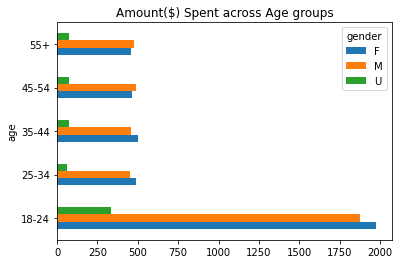

In [56]:
age_class = df.groupby(['age','gender'])["amount"].count().unstack("gender")
age_class.plot.barh(title="Amount($) Spent across Age groups")

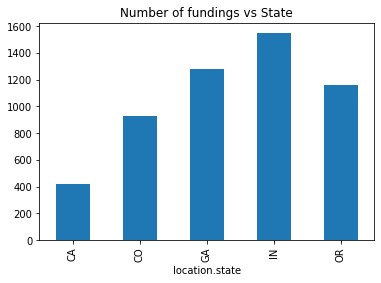

In [14]:
by_state = df.groupby(['location.state']).count()
by_state_Amt = by_state[by_state['amount'] > 400].amount
by_state_Amt.plot.bar(title="Number of fundings vs State")

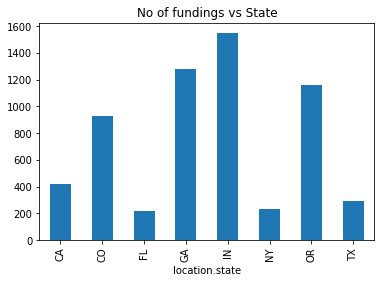

In [15]:
by_state_fund = df.groupby(['location.state']).sum()
by_state_fund = by_state[by_state_fund['amount'] > 7000].amount
by_state_fund.plot.bar(title="No of fundings vs State")

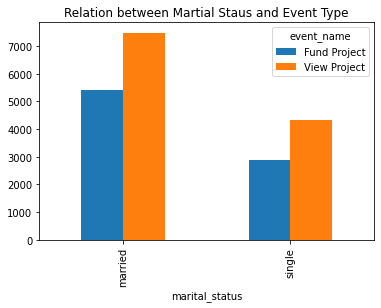

In [ ]:
by_marital_status = df.groupby(['event_name','marital_status']).size().unstack("event_name")
by_marital_status.plot.bar(title="Relation between Martial Staus and Event Type")

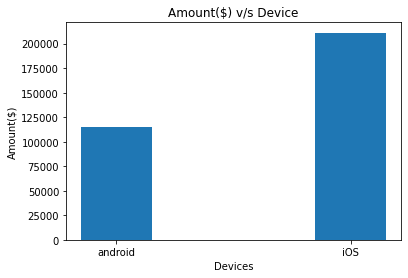

In [55]:
by_device = df.groupby(['device'])["amount"].sum()
plt.bar(by_device.index,by_device.values,width=0.3)
plt.title("Amount($) v/s Device")
plt.xlabel("Devices")
plt.ylabel("Amount($)")
plt.show()

In [ ]:
# Conclusion:
# Our ideal customer segment is a person who is:
# 1) Female 
# 2)Between the ages of 18-24 years.
# 3)Is Married
# 4)Operates an iOS device.
# 5)Lives in the any of the states of California,Georgia,Colorado and Indiana. 